# Table of Content

1) Importing Libraries

2) Loading the Data

3) Cleaning the Data

4) Date related Analysis

5) Categorical Analysis

6) Numerical Analysis

7) Conclusion: Indian Road Accident Insights

## Importing Libraries

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('C:\\Users\\Disha\\Desktop\\accident_prediction_india.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

## Cleaning the Data

Check for null values:

In [19]:
#First it's better to take a copy of dataset and work on a copy
df=data.copy()

#Checking null values accross the dataset
df.isnull().sum().sort_values(ascending=False)

Driver License Status          975
Traffic Control Presence       716
State Name                       0
City Name                        0
Alcohol Involvement              0
Driver Gender                    0
Driver Age                       0
Speed Limit (km/h)               0
Lighting Conditions              0
Road Condition                   0
Road Type                        0
Weather Conditions               0
Number of Fatalities             0
Number of Casualties             0
Vehicle Type Involved            0
Number of Vehicles Involved      0
Accident Severity                0
Time of Day                      0
Day of Week                      0
Month                            0
Year                             0
Accident Location Details        0
dtype: int64

### 🔎 Missing Data Analysis

### 🚦 **Null Values in Key Categories**
- **Driver License Status** and **Traffic Control Presence** contain a **significant number of missing values**.
- The absence of data could impact the accuracy of accident trend analysis.

In [22]:
df['Driver License Status'].value_counts()

Driver License Status
Valid      1057
Expired     968
Name: count, dtype: int64

In [24]:
df['Traffic Control Presence'].value_counts()

Traffic Control Presence
Signs               812
Signals             736
Police Checkpost    736
Name: count, dtype: int64

### 🚦 **Null Values in Key Columns**
- **Driver License Status** and **Traffic Control Presence** contain a **large share of missing values**.
- **Deleting or replacing them with the most frequent values** isn't ideal, as it may distort real patterns.

### 🏁 **Chosen Solution**
- Instead of removal or imputation, **marking them as "Unknown"** allows for further analysis while preserving data integrity.
- This approach ensures that missing values are accounted for without introducing bias.

In [27]:
df['Driver License Status']=df['Driver License Status'].fillna('Unknown')
df['Traffic Control Presence']=df['Traffic Control Presence'].fillna('Unknown')

Check for duplicated rows:

In [30]:
df.duplicated().sum()

0

- Fortunately, there are no duplicate rows.

## Date related Analysis

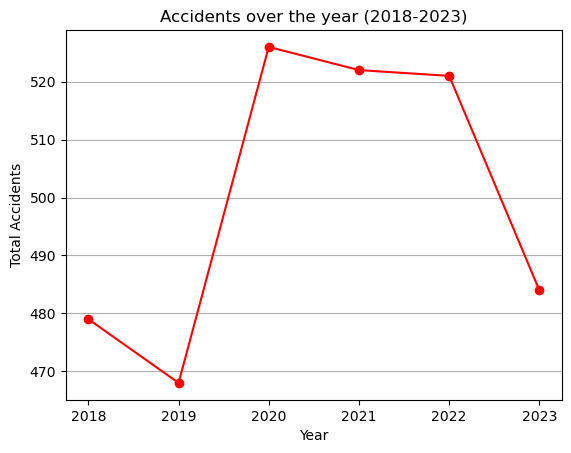

In [34]:
df['Year']=pd.to_datetime(df['Year'],format='%Y')
yearly_accident=df.groupby('Year')['Accident Severity'].count()

#Let's plot yearly_accidents to hvae better intuition.

plt.plot(yearly_accident.index,yearly_accident.values,marker='o',linestyle='-',color='red')
plt.title('Accidents over the year (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.grid(axis='y')
plt.show()

### 📅 Yearly Accident Trends

- **In 2019, we recorded the fewest accidents, but just a year later, in 2020, the number of accidents peaked.**


## Categorical Analysis

In [38]:
#Let's see the number of unique categories in each column:

cat_features=list(df.select_dtypes(include=object).columns)
for i in cat_features:
    print(f'{i}: {df[i].nunique()}')

State Name: 32
City Name: 28
Month: 12
Day of Week: 7
Time of Day: 1263
Accident Severity: 3
Vehicle Type Involved: 7
Weather Conditions: 5
Road Type: 4
Road Condition: 4
Lighting Conditions: 4
Traffic Control Presence: 4
Driver Gender: 2
Driver License Status: 3
Alcohol Involvement: 2
Accident Location Details: 4


In [40]:
#Since Time of Day has a lot of unique values it's not recomended to plot it using countplots so I remove it from the plot list
cat_columns=cat_features.remove('Time of Day')

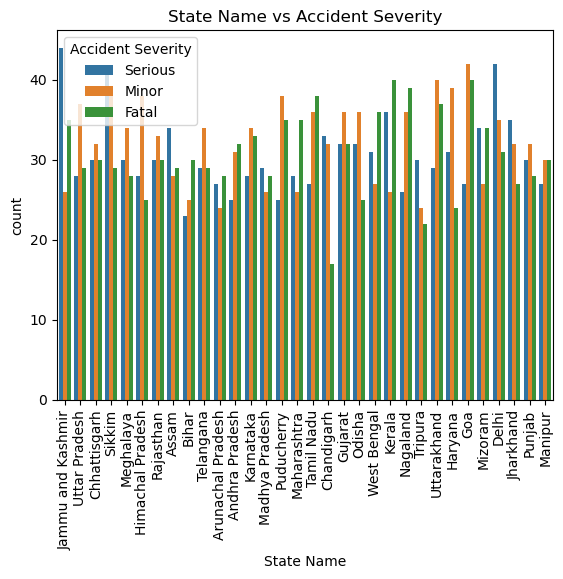

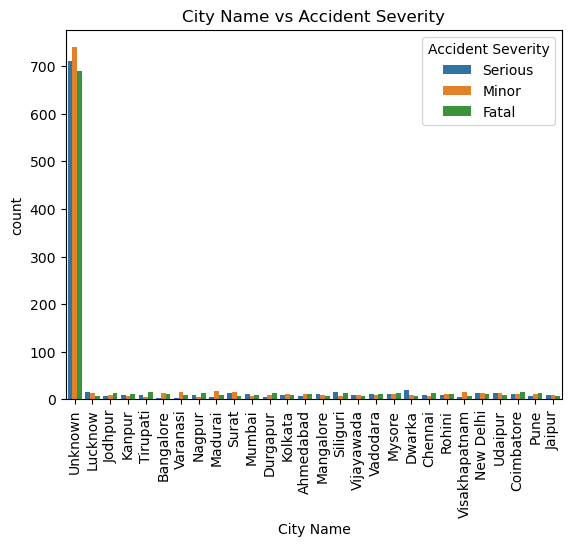

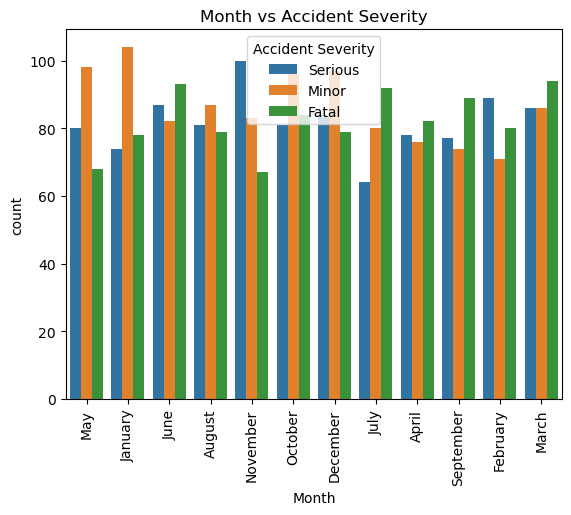

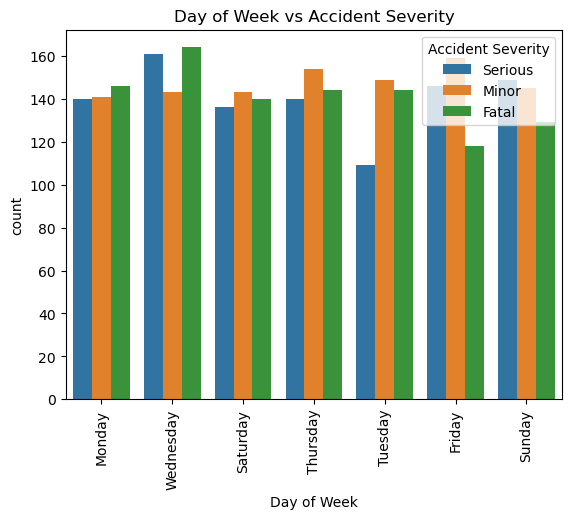

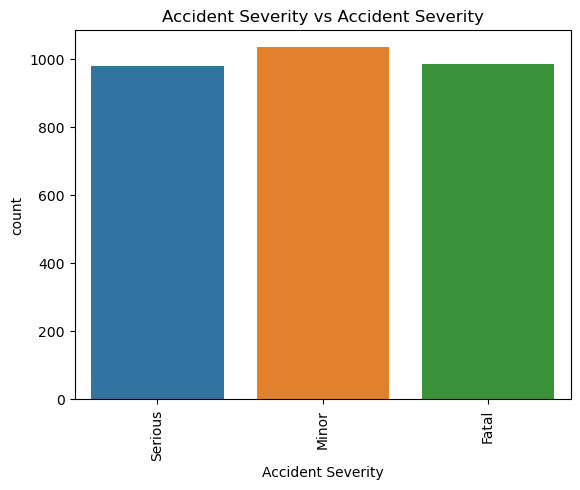

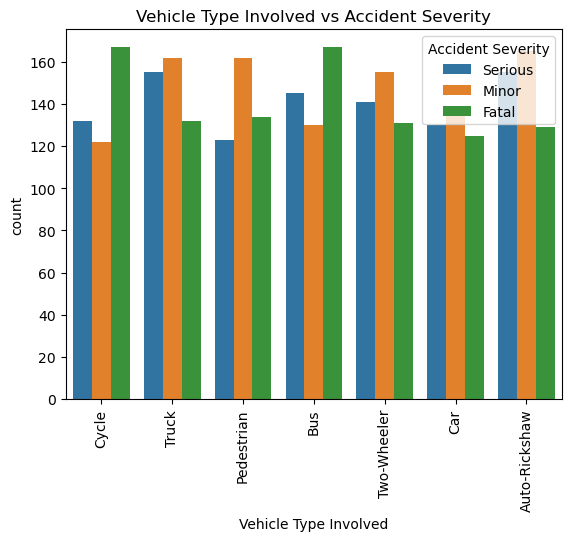

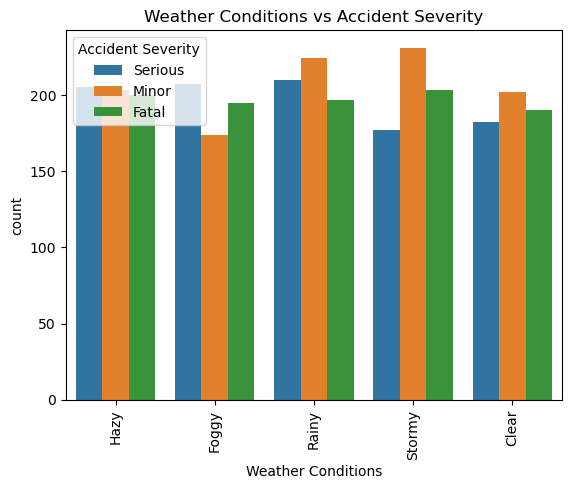

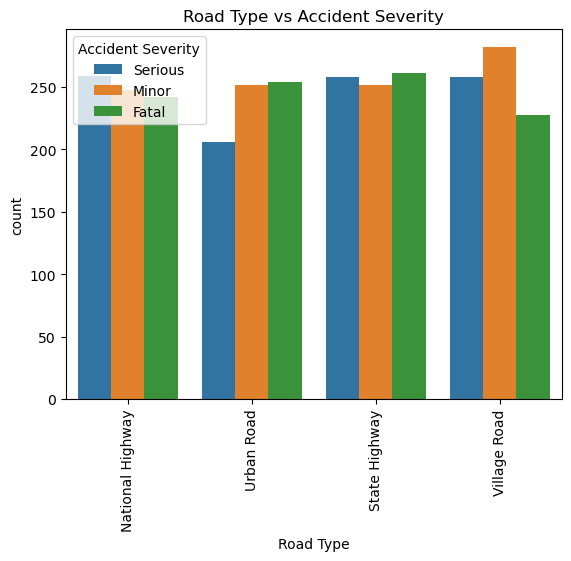

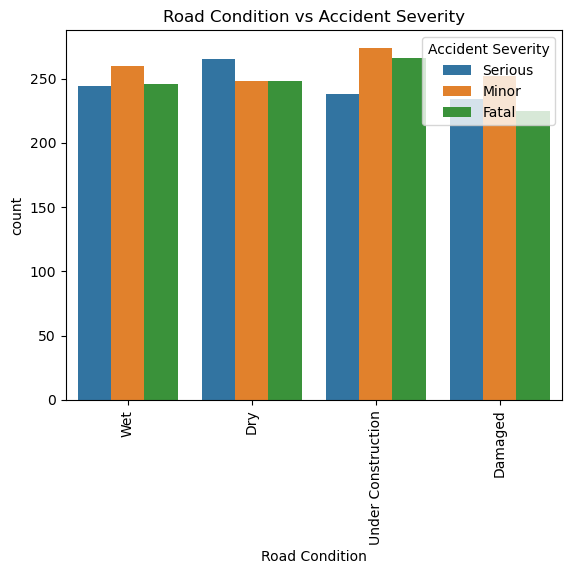

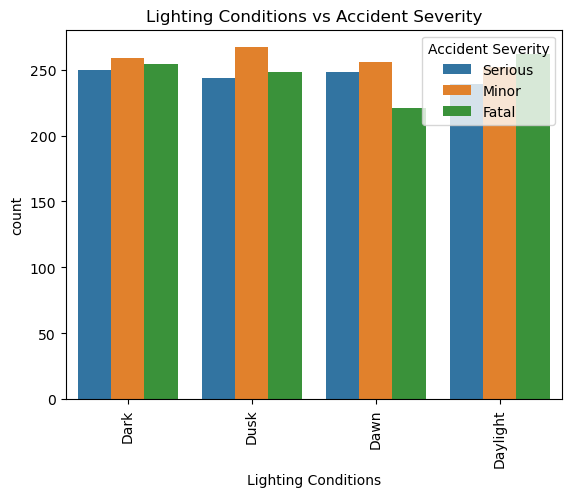

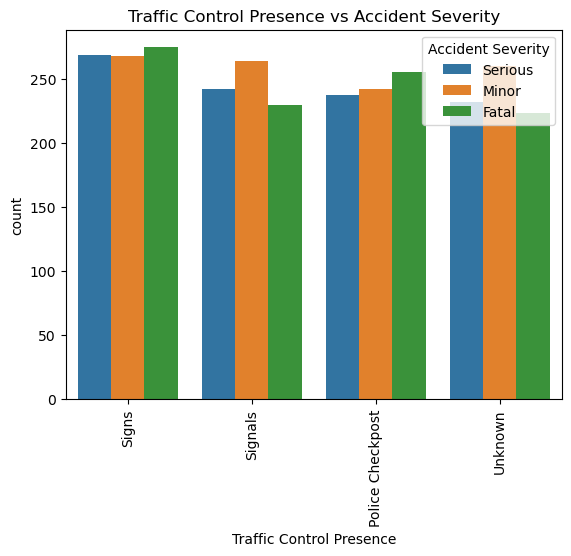

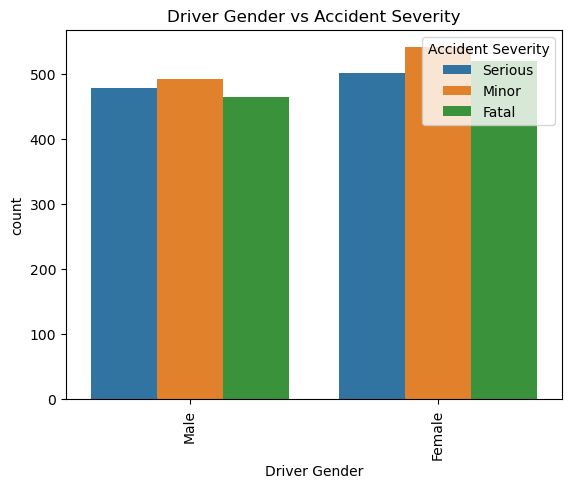

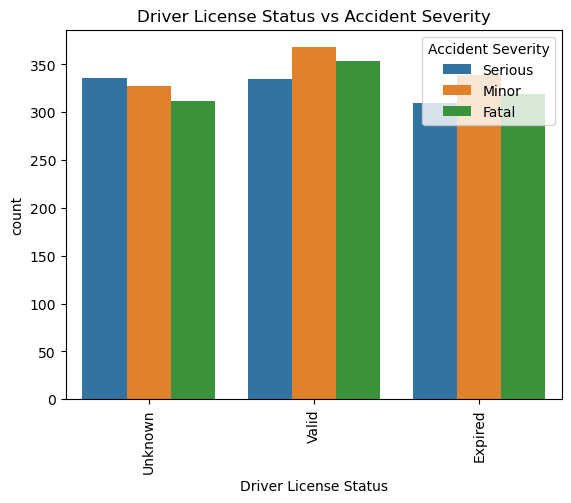

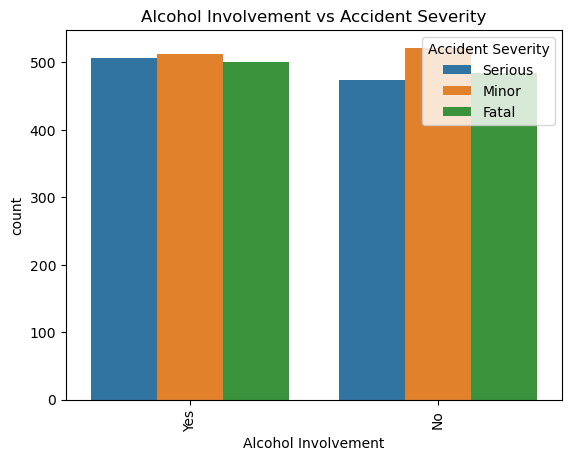

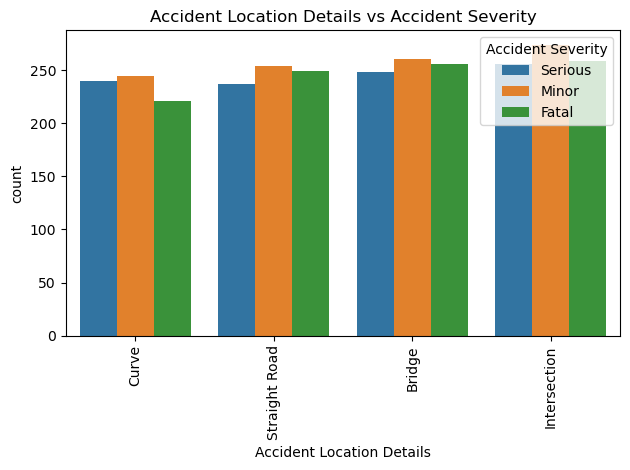

In [42]:
for i in cat_features:
    plt.figure()
    sns.countplot(data=df,x=i,hue='Accident Severity')
    plt.xticks(rotation=90)
    plt.title(f'{i} vs Accident Severity')
    
plt.tight_layout()  
plt.show()

In [43]:
#Let's analyse the Time of Day that we droped recently from the cat_features list 

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning (5AM-12PM)"
    elif 12 <= hour < 17:
        return "Afternoon (12PM-5PM)"
    elif 17 <= hour < 21:
        return "Evening (5PM-9PM)"
    else:
        return "Night (9PM-5AM)"
    
df["Time of Day"] = pd.to_datetime(df["Time of Day"], format="%H:%M")  
df["Time_Category"] = df["Time of Day"].dt.hour.apply(categorize_time)


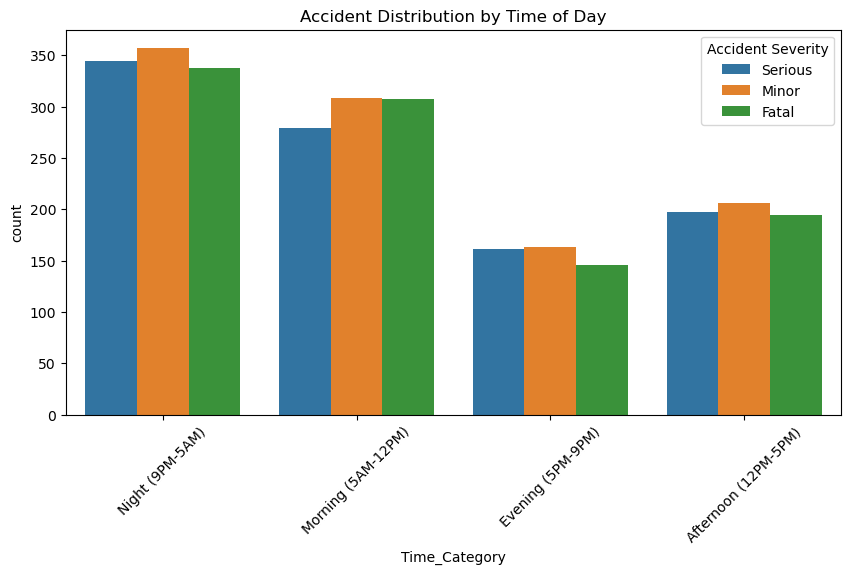

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x="Time_Category", data=df,hue='Accident Severity')
plt.title("Accident Distribution by Time of Day")
plt.xticks(rotation=45)
plt.show()

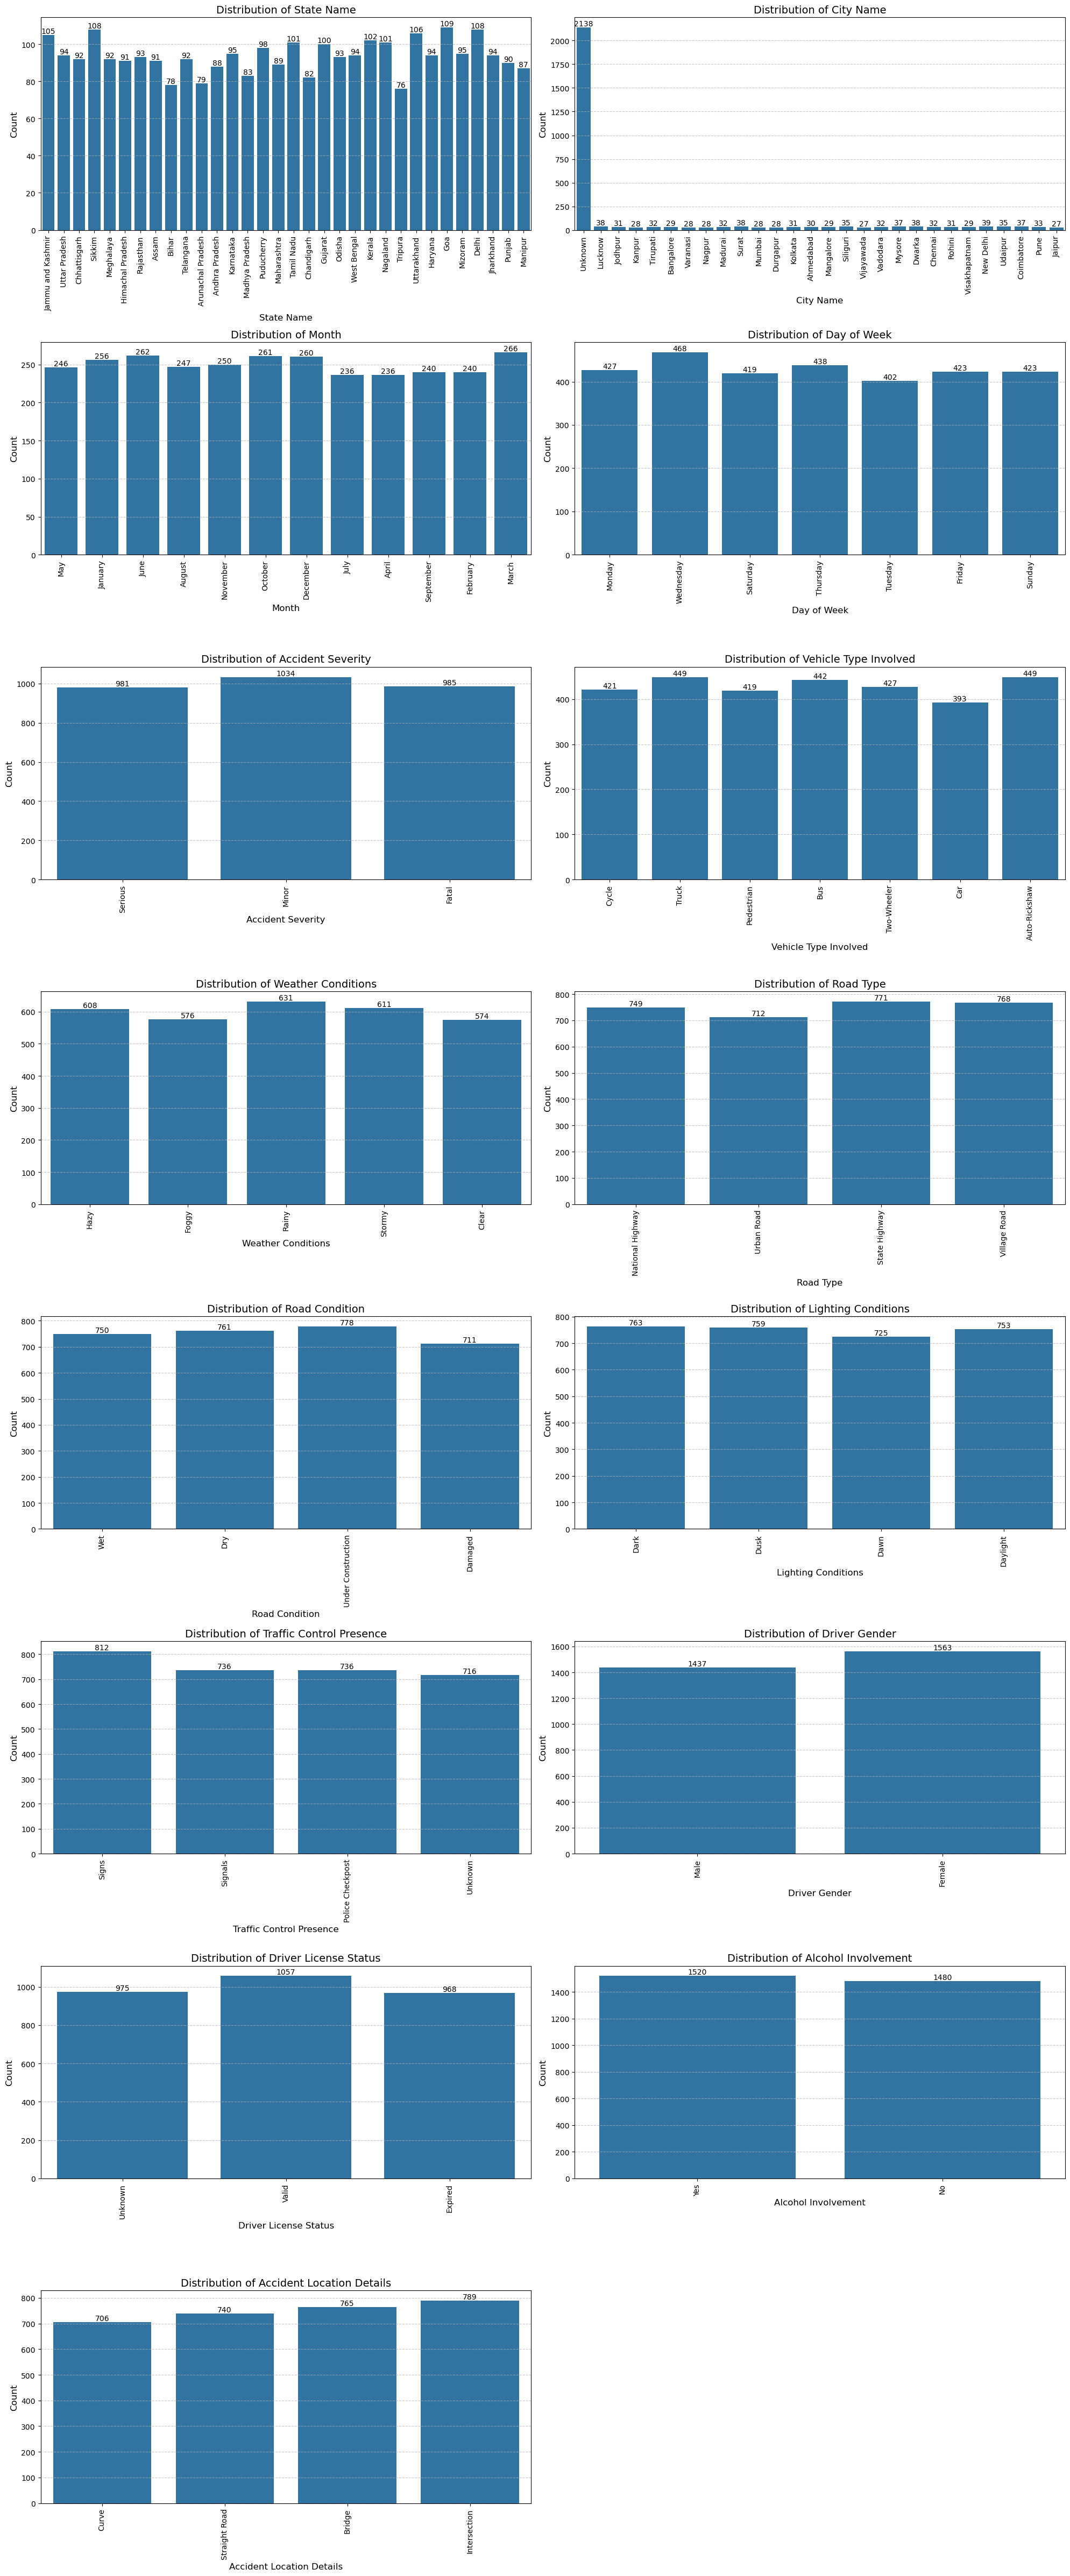

In [45]:

num_columns=2
num_rows=(len(cat_features)+1)//num_columns

fig,axes=plt.subplots(num_rows,num_columns,figsize=(20,num_rows * 6))
axes=axes.flatten()

for i , col in enumerate(cat_features):
    ax=axes[i]
    sns.countplot(data=df,x=col,ax=ax)
    
    for container in ax.containers:
        ax.bar_label(container)
        
    ax.set_title(f'Distribution of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Count',fontsize=12)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.grid(axis='y',alpha=0.7,linestyle='--')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()

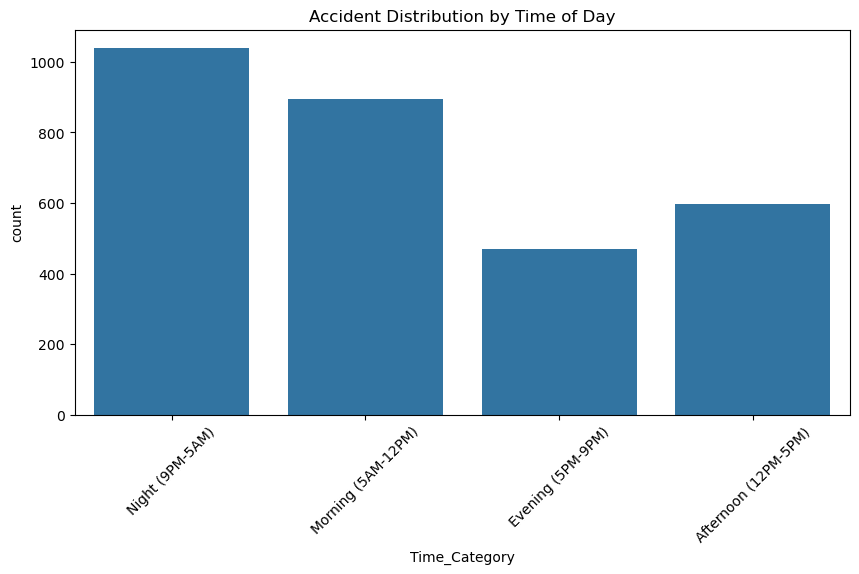

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x="Time_Category", data=df)
plt.title("Accident Distribution by Time of Day")
plt.xticks(rotation=45)
plt.show()

### 🚗 Indian Road Accident Analysis: Key Observations

### 📍 1️⃣ State-wise Accident Distribution
- **Top Three States with the Highest Number of Accidents**: Sikkim, Goa, Delhi (with a small margin between them).
- **States with the Least Number of Accidents**: Bihar, Arunachal Pradesh, Tripura.

### 🏙️ 2️⃣ City-wise Distribution
- **Over 71% of accidents** are recorded in **unknown cities**, meaning city labels are missing.

### 📅 3️⃣ Temporal Analysis
- **Peak Accident Months**: March, June, October, and December.  
  - However, the difference in accident numbers across months is relatively small.
- **Most Accidents Occur on Wednesdays**, making it the highest-risk weekday.

### ⚠️ 4️⃣ Accident Severity Distribution
- The distribution among **Serious, Fatal, and Minor accidents** is **almost balanced**, with no extreme disparities.

### 🚘 5️⃣ Vehicle Type Analysis
- **Most Frequent Vehicles Involved in Accidents**: Auto Rickshaw, Truck, and Cycle.  
  - The difference in accident rates between vehicle types is **minimal**.

### 🌦️ 6️⃣ Weather Conditions Impact
- No **major variations** in accident distribution across different weather conditions.  
- However, the **most frequent weather condition during accidents is Rainy**.

### 🛣️ 7️⃣ Road Type Impact
- Similar trends as weather conditions: no **huge difference in distribution** across road types.  
- The **most frequent road type** involved in accidents is **State Highway**.

### 🚧 8️⃣ Road Construction Impact
- **Most accidents occur on roads that were under construction** at the time of the incident.

### 🚦 9️⃣ Traffic Control & Regulation Impact
- **Most accidents happen in places with traffic signs and controls**.  
- There is also a **significant number of unknown entries** in this category.

### 🚻 🔟 Driver Characteristics
- **Drivers involved in accidents were mostly females**.

### 🪪 1️⃣ Driver License Status
- A **large portion of driver license conditions is unknown**.  
- Most drivers had **valid licenses**, but **a noticeable percentage had expired licenses**, which poses safety concerns.

### 🍷 2️⃣ Influence of Alcohol
- **Almost half of the accidents** occurred when drivers were under the influence of alcohol.

### 🏁 3️⃣ Intersection Locations
- **Most accidents happen at intersection points**, which may indicate risky road behavior at junctions.

### 🕰️ 4️⃣ Time of Day

- **Most accidents occur at night (9 PM - 5 AM)**, indicating higher risk factors such as:
  - Reduced visibility
  - Increased likelihood of driver fatigue
  - Higher chances of intoxicated driving
  - Lower traffic enforcement presence

- **The least number of accidents occur in the evening (5 PM - 9 PM)**, suggesting:
  - More regulated traffic flow
  - Lower speeds due to congestion
  - Possibly safer driving conditions due to daylight


### 🌟 5️⃣ Lighting Condition

- The distribution of accidents across different **lighting conditions** (daylight, twilight, street-lit, and dark) is **almost uniform**.
- No major spikes or drops suggest that **lighting conditions alone may not be a primary factor** affecting accident frequency.
- Further analysis could explore whether **lighting impacts accident severity** rather than frequency.
---


### 📌 Summary:
- **Road conditions**, **traffic control**, **weather**, and **vehicle type** contribute to accident trends.  
- **Expired licenses & drunk driving** are key risk factors.  
- **Intersection points and under-construction roads** show higher accident rates.

- **Night-time** driving increases the risk of accident.



## Numerical Analysis

In [51]:
num_features=list(df.select_dtypes(exclude=['object','datetime64[ns]']).columns)

#Let's seperate the continuous numerical columns from discrete ones
continueus_features=['Driver Age','Speed Limit (km/h)']
discrete_features=[i for i in num_features if i not in continueus_features ]


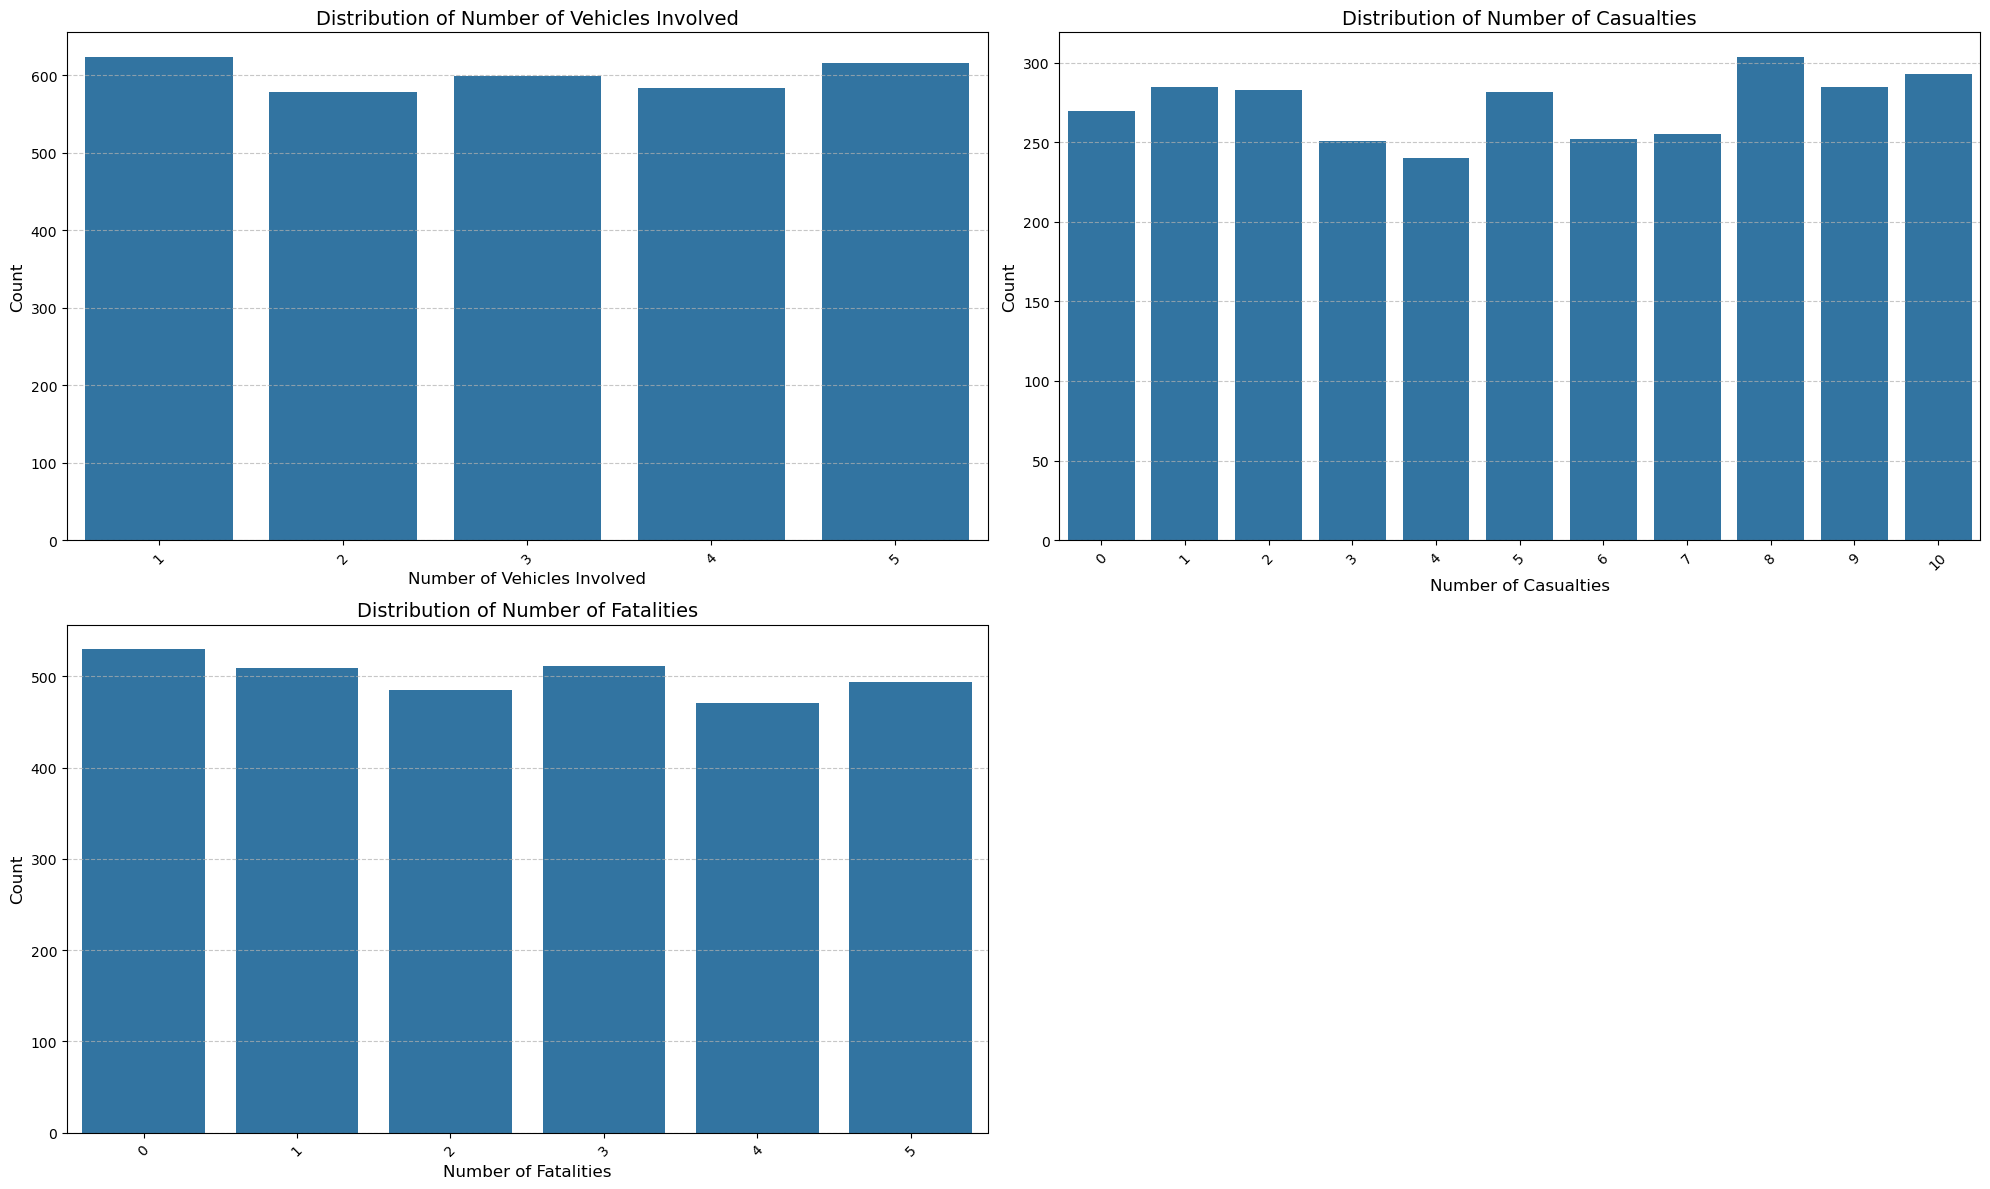

In [53]:

num_columns=2
num_row=((len(discrete_features)+1)//num_columns)

fig,axes=plt.subplots(num_row,num_columns,figsize=(20,num_row * 6))
axes=axes.flatten()

for i,col in enumerate(discrete_features):
    ax=axes[i]
    sns.countplot(data=df,x=col,ax=ax)
    
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()



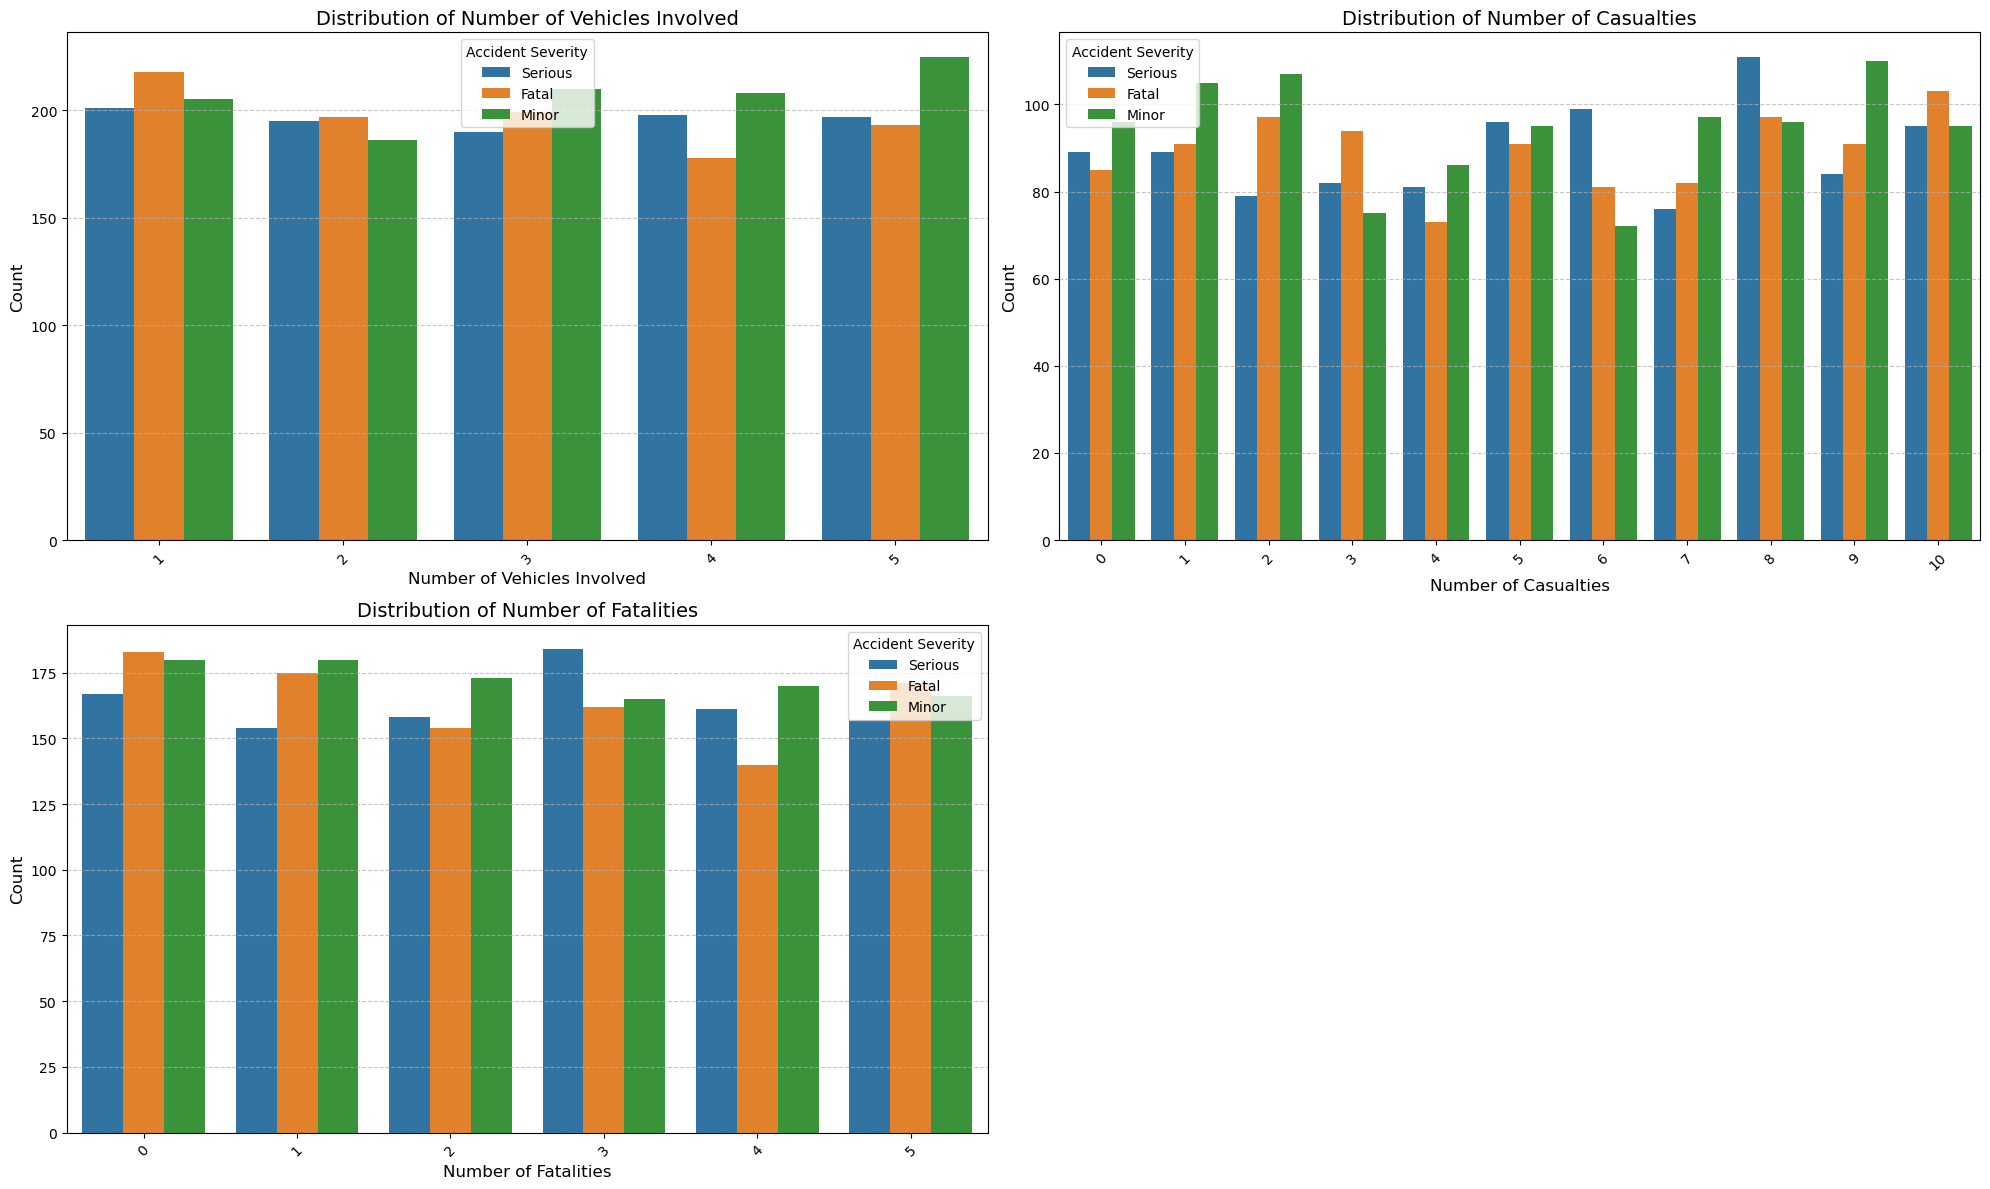

In [54]:

num_columns=2
num_row=((len(discrete_features)+1)//num_columns)

fig,axes=plt.subplots(num_row,num_columns,figsize=(20,num_row * 6))
axes=axes.flatten()

for i,col in enumerate(discrete_features):
    ax=axes[i]
    sns.countplot(data=df,x=col,ax=ax,hue='Accident Severity')
    
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()



### 🔢 Distribution of Discrete Numerical Data

### 🚗 1️⃣ Number of Vehicles Involved
- A **noticeable number of accidents** involve **more than 2 vehicles**.
- Multi-vehicle accidents may indicate **chain collisions or intersection crashes**.

### 🔥 2️⃣ Casualties Per Accident
- **Many accidents resulted in more than 3 casualties**.
- **Notable peaks** observed for accidents with **8, 9, and 10 casualties**.
- However, **injury severity is unknown**, meaning casualties could range from **minor injuries to fatalities**.

### ⚠️ 3️⃣ Fatal Accident Trends
- **Higher fatal accident ratio observed** for cases with **3, 5, or 10 casualties**.
- **Fatal accidents occur considerably across all casualty numbers**, but specific spikes exist for certain values.
- **83% of accidents include fatalities**, meaning **loss of life is a significant factor in this dataset**.
- **Almost half of recorded accidents had 3 or more fatalities**, reinforcing the severity of these events.

### 📌 Implications:
- **Intersection safety measures** could help prevent multi-vehicle accidents.
- **Further analysis on injury severity** might reveal additional insights into **healthcare and emergency response effectiveness**.
- **Risk assessment models** could identify patterns in **fatal accident trends** for proactive intervention.

In [56]:
df[continueus_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Driver Age,3000.0,44.177000,15.402860,18.0,31.0,45.0,57.0,70.0
Speed Limit (km/h),3000.0,74.940667,26.765088,30.0,51.0,75.0,99.0,120.0


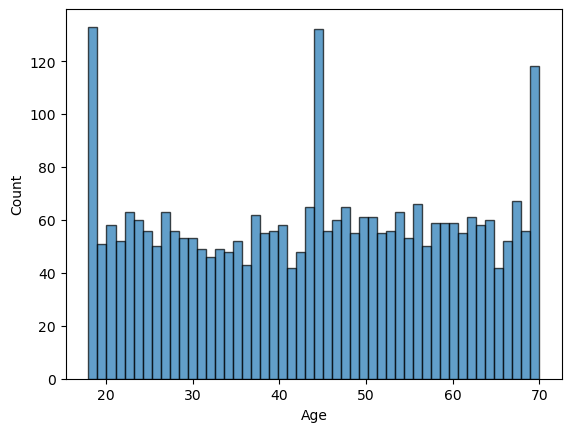

In [57]:
plt.figure()
plt.hist(df[continueus_features[0]],bins=50,edgecolor='black',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

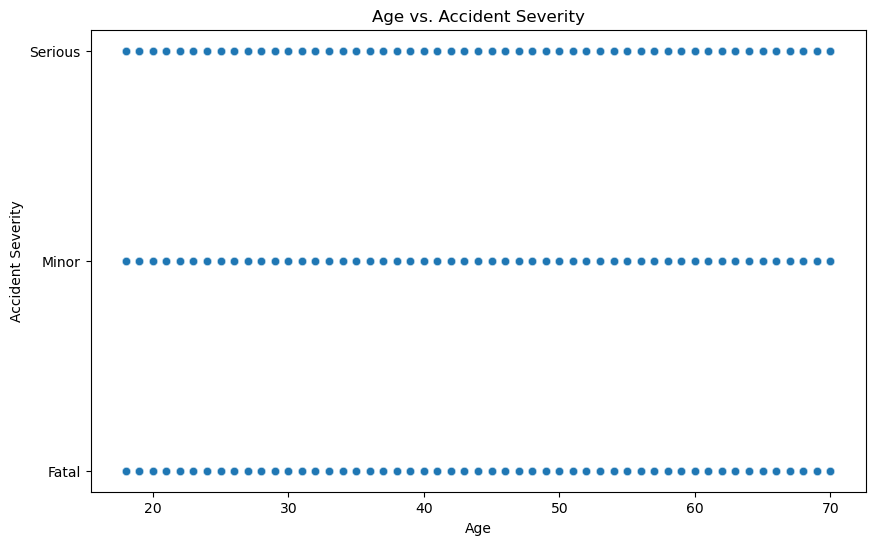

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Driver Age"], y=df["Accident Severity"], alpha=0.6)
plt.title("Age vs. Accident Severity")
plt.xlabel("Age")
plt.ylabel("Accident Severity")
plt.show()

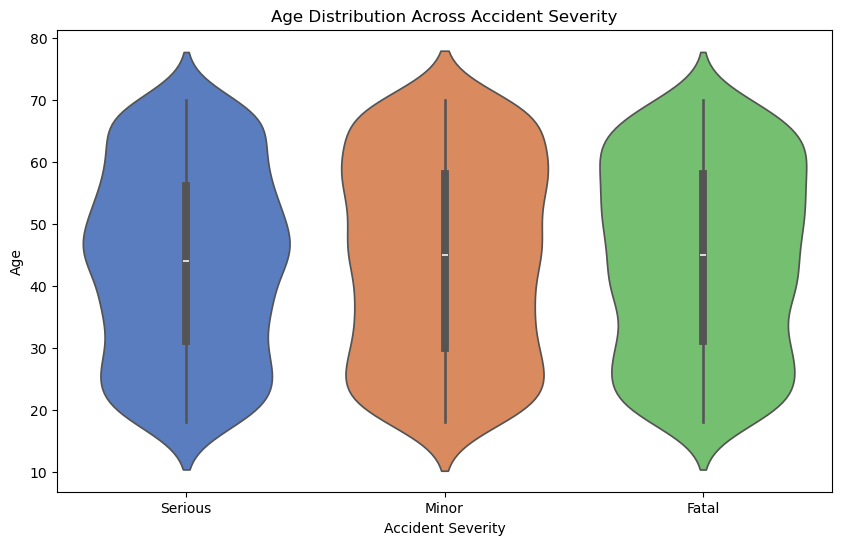

In [59]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["Accident Severity"], y=df["Driver Age"], palette="muted",hue=df["Accident Severity"])
plt.title("Age Distribution Across Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Age")
plt.show()

### 🧑‍🤝‍🧑 Age Distribution vs. Accident Trends

### 🔍 Key Observations:
- **No accidents recorded for individuals under the legal driving age (18)**, suggesting compliance with age regulations.
- **25% of accidents involved drivers aged 57 and above**, indicating potential risk factors such as:
  - Reduced reaction time
  - Possible health-related driving impairments
- **High accident frequencies observed at ages 18, 45, and 65**, showing a near **normal distribution** across accident severity categories.

### 📌 Implications:
- Younger drivers (18 years) and older drivers (65 years) show notable accident frequencies, possibly due to the physical limitations of older individuals and the high excitement levels of younger drivers.
- **Further analysis on age-related accident severity** could uncover whether certain age groups are more prone to fatal crashes.
- **Comparing age trends with external factors** (e.g., vehicle type, intoxication levels) could provide deeper insights.

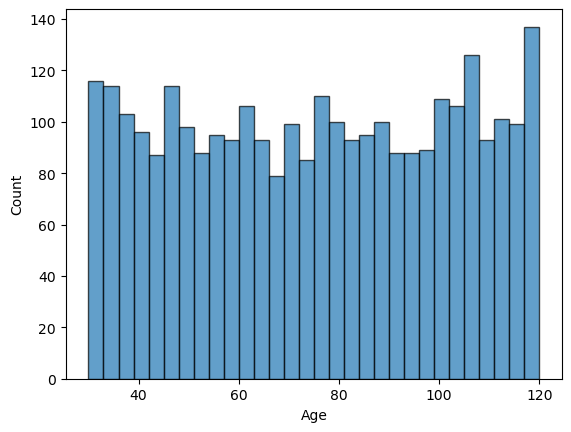

In [61]:
continueus_features=['Driver Age','Speed Limit (km/h)']

plt.figure()
plt.hist(df[continueus_features[1]],bins=30,edgecolor='black',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

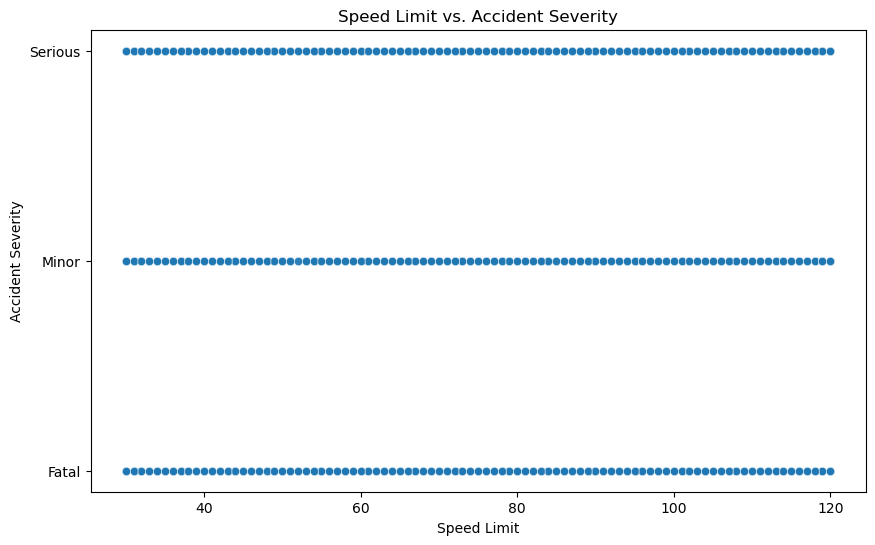

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Speed Limit (km/h)"], y=df["Accident Severity"], alpha=0.6)
plt.title("Speed Limit vs. Accident Severity")
plt.xlabel("Speed Limit")
plt.ylabel("Accident Severity")
plt.show()

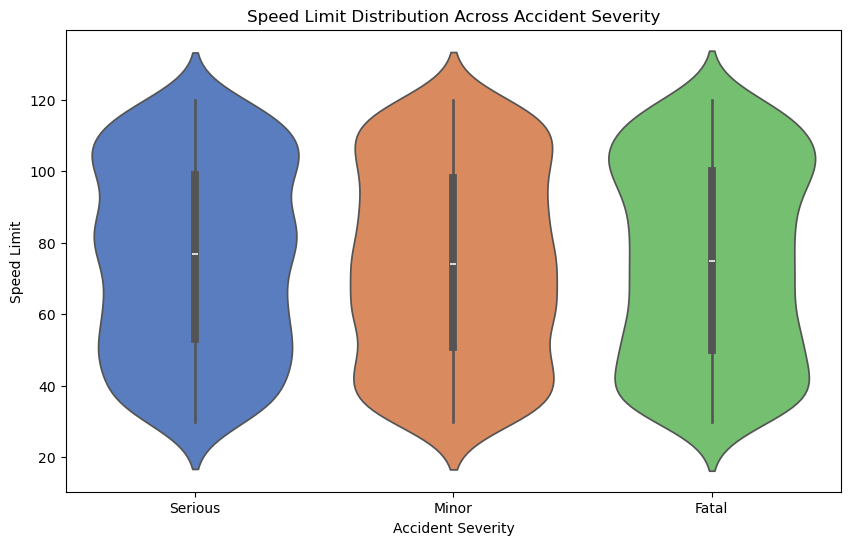

In [63]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["Accident Severity"], y=df["Speed Limit (km/h)"], palette="muted",hue=df["Accident Severity"])
plt.title("Speed Limit Distribution Across Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit")
plt.show()

### 🚗 Speed vs. Fatal Accidents

### 🔍 Key Observations:
- **Fatal accidents are more common at speeds exceeding 100 km/h**.
- Interestingly, **fatal accidents also occur at speeds below 60 km/h**, possibly involving **cyclists and two-wheelers**, which are more vulnerable at lower speeds.

### ⚠️ High-Speed Risks:
- **Higher speed limits for cars significantly increase the likelihood of fatal accidents**.
- **Impact severity increases at high speeds**, leading to a greater risk of life-threatening injuries.

### 📌 Implications:
- **Strict speed regulations** could help reduce fatalities at extreme speeds.
- **Further analysis** on vehicle type vs. speed impact may clarify whether lower-speed fatal accidents involve specific vehicle categories.



## Conclusion: Indian Road Accident Insights

After analyzing multiple factors, we can summarize the key findings into major themes:


### 🏁 1️⃣ Yearly Trends
- **2019 recorded the least accidents**, but in **2020, accidents peaked**, showing a sharp rise in incidents.

---

### 📍 2️⃣ State-wise Accident Distribution
- **Top Three States with the Highest Number of Accidents**: Sikkim, Goa, Delhi (with a small margin between them).
- **States with the Least Number of Accidents**: Bihar, Arunachal Pradesh, Tripura.

---

### 🏙️ 3️⃣ City-wise Distribution
- **Over 71% of accidents** are recorded in **unknown cities**, meaning location data is incomplete.

---

### 📅 4️⃣ Temporal Analysis
- **Peak Accident Months**: March, June, October, and December.  
  - The margin between months is relatively small.
- **Most Accidents Occur on Wednesdays**, marking it as the riskiest weekday.

---

### ⚠️ 5️⃣ Accident Severity Distribution
- **Serious, Fatal, and Minor accidents** are **evenly distributed**, with no extreme disparities.

---

### 🚘 6️⃣ Vehicle Type Analysis
- **Most Frequent Vehicles Involved in Accidents**: Auto Rickshaw, Truck, and Cycle.
  - The difference in accident rates among vehicle types is minimal.

---

### 🌦️ 7️⃣ Weather Conditions Impact
- **Accident distribution remains fairly consistent** across weather conditions.
- **The most frequent weather condition during accidents is Rainy**.

---

### 🛣️ 8️⃣ Road Type Impact
- **State Highways report the highest accident frequency**.
- **Overall accident rates remain balanced** across different road types.

---

### 🚧 9️⃣ Road Construction Impact
- **Accidents frequently occur on roads under construction**, highlighting infrastructure risks.

---

### 🚦 🔟 Traffic Control & Regulation Impact
- **Many accidents happen in areas with traffic signs and signals**.
- **A significant portion of traffic regulation data is missing**, leading to gaps in analysis.

---

### 🚻 1️⃣1️⃣ Driver Characteristics
- **Female drivers are recorded more frequently in accidents**, but further study is needed.

---

### 🪪 1️⃣2️⃣ Driver License Status
- **Many driver license conditions are unknown**.
- **Expired licenses appear frequently in accident reports**, raising safety concerns.

---

### 🍷 1️⃣3️⃣ Influence of Alcohol
- **Almost half of the accidents involved drunk driving**, reinforcing alcohol-related risks.

---

### 🏁 1️⃣4️⃣ Intersection Locations
- **Most accidents happen at intersections**, likely due to risky traffic behavior.

---

### 🕰️ 1️⃣5️⃣ Time of Day Impact
- **Most accidents occur at night (9 PM - 5 AM)**, linked to:
  - Reduced visibility
  - Driver fatigue
  - Higher intoxication rates
- **The least number of accidents occur in the evening (5 PM - 9 PM)**.

---

### 🌟 1️⃣6️⃣ Lighting Condition
- **Accident distribution remains nearly uniform across lighting conditions**.
- **Lighting itself doesn’t seem to be a strong predictor of accident frequency**.

---

### 🔢 1️⃣7️⃣ Distribution of Discrete Numerical Data

### 🚗 Number of Vehicles Involved
- **Accidents with more than 2 vehicles are common**, suggesting frequent chain collisions.

### 🔥 Casualties Per Accident
- **Many accidents involve 3+ casualties**.
- **Notable peaks observed for 8, 9, and 10 casualties**.
- **Casualty severity is unknown**, meaning injuries could range from minor to fatal.

### ⚠️ Fatal Accident Trends
- **Fatality rates are high for accidents with 3, 5, and 10 casualties**.
- **83% of accidents involve fatalities**.
- **Almost half of recorded accidents had 3 or more fatalities**.

---

### 🧑‍🤝‍🧑 1️⃣8️⃣ Age Distribution vs. Accident Trends
- **No recorded accidents for individuals under 18**, showing compliance with legal driving age.
- **25% of accidents involve drivers aged 57+**, potentially linked to reaction time.
- **High accident frequencies observed at ages 18, 45, and 65**, with a near-normal severity distribution.

---

### 🚗 1️⃣9️⃣ Speed vs. Fatal Accidents
- **Fatal accidents occur more frequently at speeds exceeding 100 km/h**.
- **Fatal accidents are also recorded at speeds below 60 km/h**, possibly due to cyclists and two-wheelers.
- **Higher speed limits are directly linked to an increased fatal accident rate**.

---

### 📌 **Conclusion & Key Takeaways**
✅ **Night-time driving** significantly increases accident risk.  
✅ **Drunk driving and expired licenses** are major contributing factors.  
✅ **Multi-vehicle crashes, intersection points, and under-construction roads** are accident hotspots.  
✅ **High-speed driving leads to more severe accidents**, reinforcing the need for stricter enforcement.  
✅ **Age-related accident trends suggest both younger (18) and older (65+) drivers face unique risks**.  
✅ **Further analysis should focus on casualty severity levels**, helping understand healthcare response effectiveness.

In [84]:
# ✅ Normalize column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# ✅ Convert 'time_of_day' to string (Power BI reads time better as string if not in datetime format)
if 'time_of_day' in df.columns:
    df['time_of_day'] = df['time_of_day'].astype(str)

# ✅ Replace missing or unknown values if needed
df.replace('Unknown', 'Not Specified', inplace=True)
df.fillna('Not Specified', inplace=True)

# ✅ Export to CSV for Power BI
export_path = "cleaned_india_road_accidents.csv"
df.to_csv(export_path, index=False)

print(f"✅ Cleaned data exported to: {export_path}")


✅ Cleaned data exported to: cleaned_india_road_accidents.csv
